Task 2: Credit Risk Prediction
Objective:
Predict whether a loan applicant is likely to default on a loan.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [29]:
df = pd.read_csv("Loan Prediction.csv")
df.drop("Id", axis=1, inplace = True)

In [30]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [32]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [33]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Text(0.5, 1.0, 'Distribution of Risk Flag')

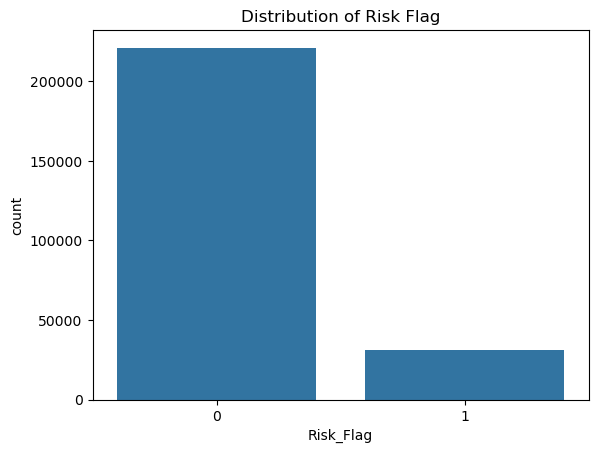

In [34]:
sns.countplot(x='Risk_Flag', data=df)
plt.title("Distribution of Risk Flag")

In [ ]:

categorical_cols = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [44]:
X = df.drop("Risk_Flag", axis=1)
y = df["Risk_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.8985912698412698

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.76     50400
weighted avg       0.89      0.90      0.90     50400



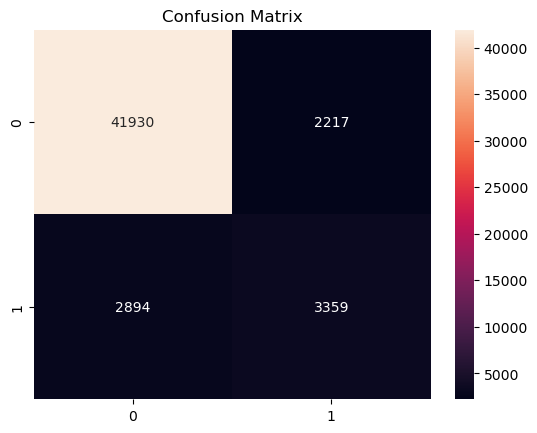

In [46]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [61]:
print(label_encoders['Married/Single'].classes_)

[0 1]


In [71]:
print(label_encoders['House_Ownership'].classes_)

[0 1 2]


In [63]:
label_encoders['Married/Single'] = LabelEncoder()
label_encoders['Married/Single'].fit(df['Married/Single'])

print(label_encoders['Married/Single'].classes_)

[0 1]


In [78]:
df['Married/Single'] = df['Married/Single'].replace({0: 'single', 1: 'married'})
label_encoders['Married/Single'] = LabelEncoder()
label_encoders['Married/Single'].fit(df['Married/Single'])


LabelEncoder()

In [80]:
df['House_Ownership'] = df['House_Ownership'].replace({0:'rented' , 1: 'owned' , 2: 'norent' })
df['House_Ownership'] = df['House_Ownership'].astype(str)
label_encoders['House_Ownership'] = LabelEncoder()
label_encoders['House_Ownership'].fit(df['House_Ownership'])

LabelEncoder()

In [92]:
# Create a new customer profile (random values as example)
new_data = pd.DataFrame({
    'Income': [40000],
    'Age': [22],
    'Experience': [1],
    'Married/Single': [label_encoders['Married/Single'].transform(['married'])[0]],
    'House_Ownership': [label_encoders['House_Ownership'].transform(['rented'])[0]],
    'Car_Ownership': [label_encoders['Car_Ownership'].transform(['no'])[0]],
    'Profession': [label_encoders['Profession'].transform(['Software_Developer'])[0]],
    'CITY': [label_encoders['CITY'].transform(['Bhubaneswar'])[0]],
    'STATE': [label_encoders['STATE'].transform(['Odisha'])[0]],
    'CURRENT_JOB_YRS': [0.5],
    'CURRENT_HOUSE_YRS': [1]
})

# Prediction
risk_prediction = model.predict(new_data)
print("Prediction (1=Risky, 0=Safe):", risk_prediction)


Prediction (1=Risky, 0=Safe): [0]


In [103]:
allowed_values = {
    'Married/Single': label_encoders['Married/Single'].classes_.tolist(),
    'House_Ownership': label_encoders['House_Ownership'].classes_.tolist(),
    'Car_Ownership': label_encoders['Car_Ownership'].classes_.tolist(),
    'Profession': label_encoders['Profession'].classes_.tolist(),
    'CITY': label_encoders['CITY'].classes_.tolist(),
    'STATE': label_encoders['STATE'].classes_.tolist()
}
for feature, values in allowed_values.items():
    print(f"{feature}: {values}")


Married/Single: ['married', 'single']
House_Ownership: ['norent_noown', 'owned', 'rented']
Car_Ownership: ['no', 'yes']
Profession: ['Air_traffic_controller', 'Analyst', 'Architect', 'Army_officer', 'Artist', 'Aviator', 'Biomedical_Engineer', 'Chartered_Accountant', 'Chef', 'Chemical_engineer', 'Civil_engineer', 'Civil_servant', 'Comedian', 'Computer_hardware_engineer', 'Computer_operator', 'Consultant', 'Dentist', 'Design_Engineer', 'Designer', 'Drafter', 'Economist', 'Engineer', 'Fashion_Designer', 'Financial_Analyst', 'Firefighter', 'Flight_attendant', 'Geologist', 'Graphic_Designer', 'Hotel_Manager', 'Industrial_Engineer', 'Lawyer', 'Librarian', 'Magistrate', 'Mechanical_engineer', 'Microbiologist', 'Official', 'Petroleum_Engineer', 'Physician', 'Police_officer', 'Politician', 'Psychologist', 'Scientist', 'Secretary', 'Software_Developer', 'Statistician', 'Surgeon', 'Surveyor', 'Technical_writer', 'Technician', 'Technology_specialist', 'Web_designer']
CITY: ['Adoni', 'Agartala', 'A

In [104]:


# Take inputs from user
income = float(input("Enter Income: "))
age = int(input("Enter Age: "))
experience = float(input("Enter Years of Experience: "))
marital_status = input("Enter Marital Status (married/single): ").strip().lower()
house_ownership = input("Enter House Ownership (owned/rented/other): ").strip().lower()
car_ownership = input("Car Ownership? (yes/no): ").strip().lower()
profession = input("Enter Profession: ").strip()
city = input("Enter City: ").strip()
state = input("Enter State: ").strip()
current_job_yrs = float(input("Enter Current Job Years: "))
current_house_yrs = float(input("Enter Current House Years: "))

# Encode categorical values
marital_status_enc = label_encoders['Married/Single'].transform([marital_status])[0]
house_ownership_enc = label_encoders['House_Ownership'].transform([house_ownership])[0]
car_ownership_enc = label_encoders['Car_Ownership'].transform([car_ownership])[0]
profession_enc = label_encoders['Profession'].transform([profession])[0]
city_enc = label_encoders['CITY'].transform([city])[0]
state_enc = label_encoders['STATE'].transform([state])[0]

# Create DataFrame for prediction
new_data = pd.DataFrame({
    'Income': [income],
    'Age': [age],
    'Experience': [experience],
    'Married/Single': [marital_status_enc],
    'House_Ownership': [house_ownership_enc],
    'Car_Ownership': [car_ownership_enc],
    'Profession': [profession_enc],
    'CITY': [city_enc],
    'STATE': [state_enc],
    'CURRENT_JOB_YRS': [current_job_yrs],
    'CURRENT_HOUSE_YRS': [current_house_yrs]
})

# Make prediction
risk_prediction = model.predict(new_data)[0]

# Show result
if risk_prediction == 1:
    print("\n🚨 This person is predicted to be RISKY.")
else:
    print("\n✅ This person is predicted to be SAFE.")


Enter Income:  50000
Enter Age:  25
Enter Years of Experience:  8
Enter Marital Status (married/single):  single
Enter House Ownership (owned/rented/other):  owned
Car Ownership? (yes/no):  no
Enter Profession:  Analyst
Enter City:  Adoni
Enter State:  Andhra_Pradesh
Enter Current Job Years:  9
Enter Current House Years:  20



✅ This person is predicted to be SAFE.
